In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples


In [10]:
Airlines= pd.read_excel(r"C:\Users\Kajal\OneDrive\Documents\east airlines.xlsx")

In [11]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
Airlines.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)


In [14]:
Airlines.set_index('ID',inplace=True)
Airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [15]:
Airlines.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [16]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [17]:
## different cc_miles have different max values.
print('unique_cc1',Airlines.cc1_miles.unique())
print('unique_cc2',Airlines.cc2_miles.unique())
print('unique_cc3',Airlines.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


#### missing values

In [18]:
##  null count for columns

null_count_col = Airlines.isnull().sum().value_counts(ascending=False)
null_percent_col = (Airlines.isnull().sum() * 100 / len(Airlines)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    11
dtype: int64 

Null Percentage for Columns:

 0.0    11
dtype: int64


In [19]:
### null count for rows

null_count_row = Airlines.isnull().sum(axis=1).value_counts(ascending=False)

null_percent_row = (Airlines.isnull().sum(axis=1) * 100 / len(Airlines)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    3999
dtype: int64 

Null Percentage for Rows:

 0.0    3999
dtype: int64


#### Duplicated values 

In [20]:
Airlines.duplicated().sum()

1

In [21]:
Airlines[Airlines.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


## EDA

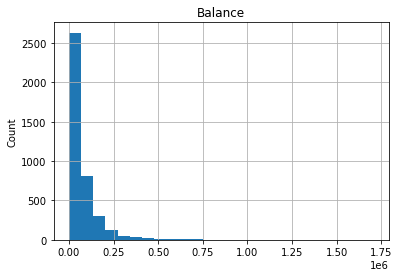

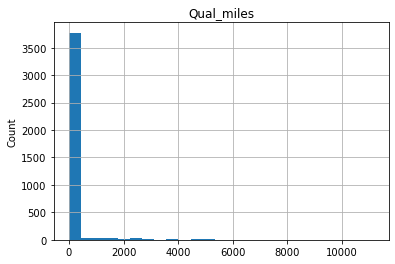

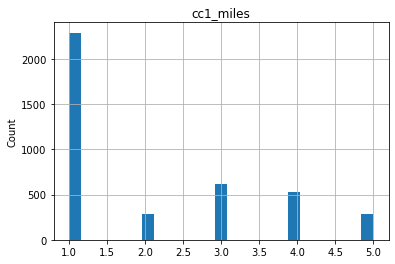

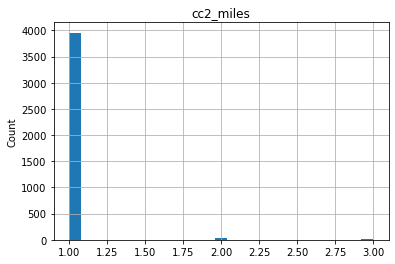

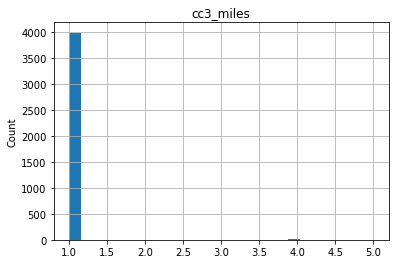

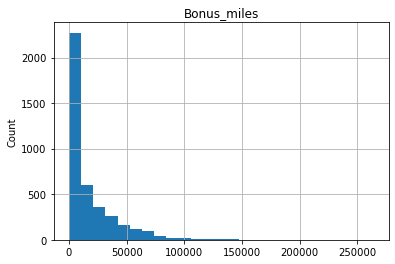

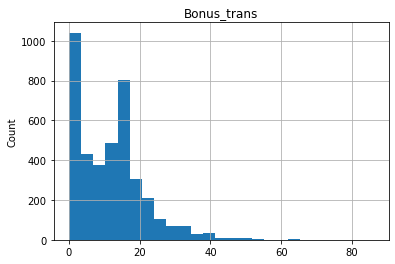

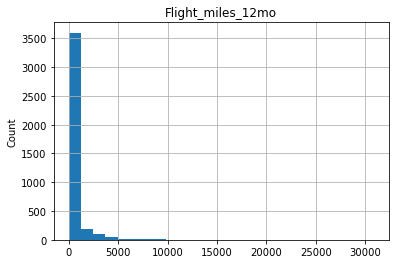

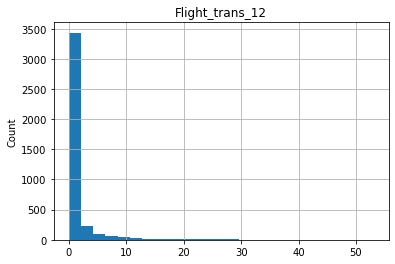

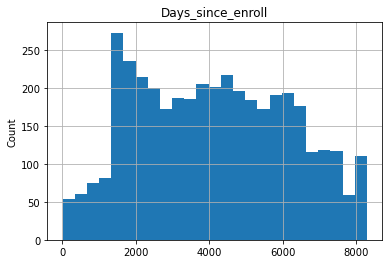

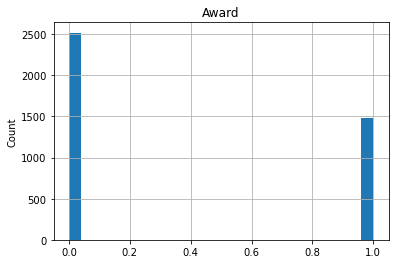

In [22]:
for feature in Airlines.columns:
    Airlines=Airlines.copy()
    Airlines[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


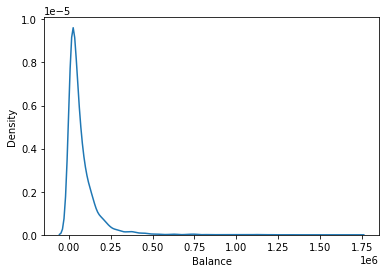

Qual_miles


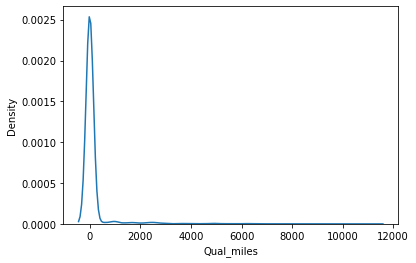

cc1_miles


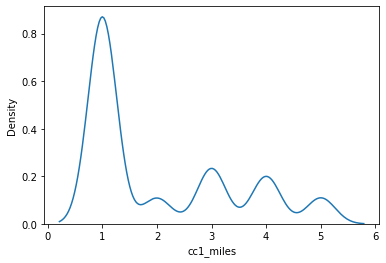

cc2_miles


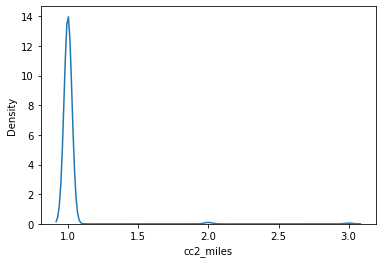

cc3_miles


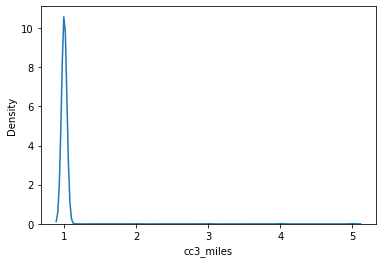

Bonus_miles


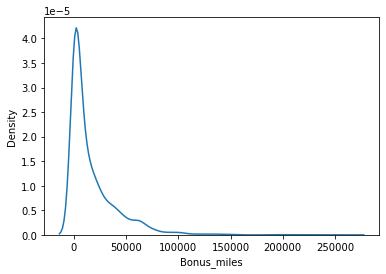

Bonus_trans


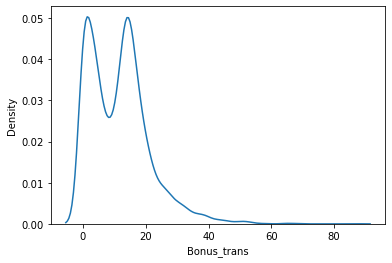

Flight_miles_12mo


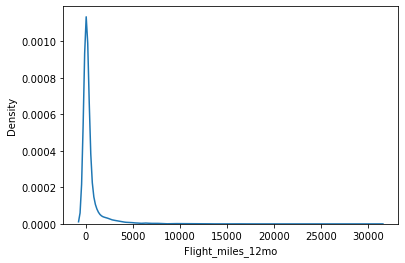

Flight_trans_12


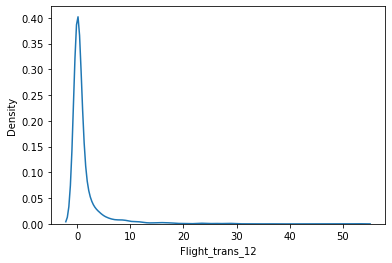

Days_since_enroll


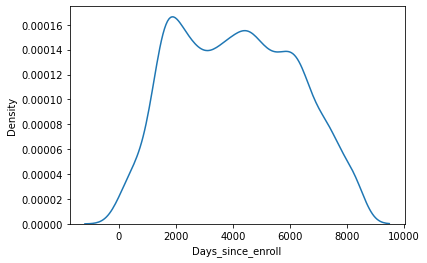

Award


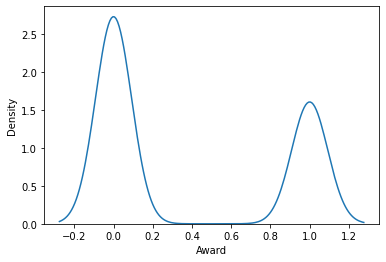

In [23]:
for n in Airlines.columns:
    print(n)
    sns.kdeplot(Airlines[n])
    plt.show()

#### Outliers Detection

In [28]:
Airlines.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

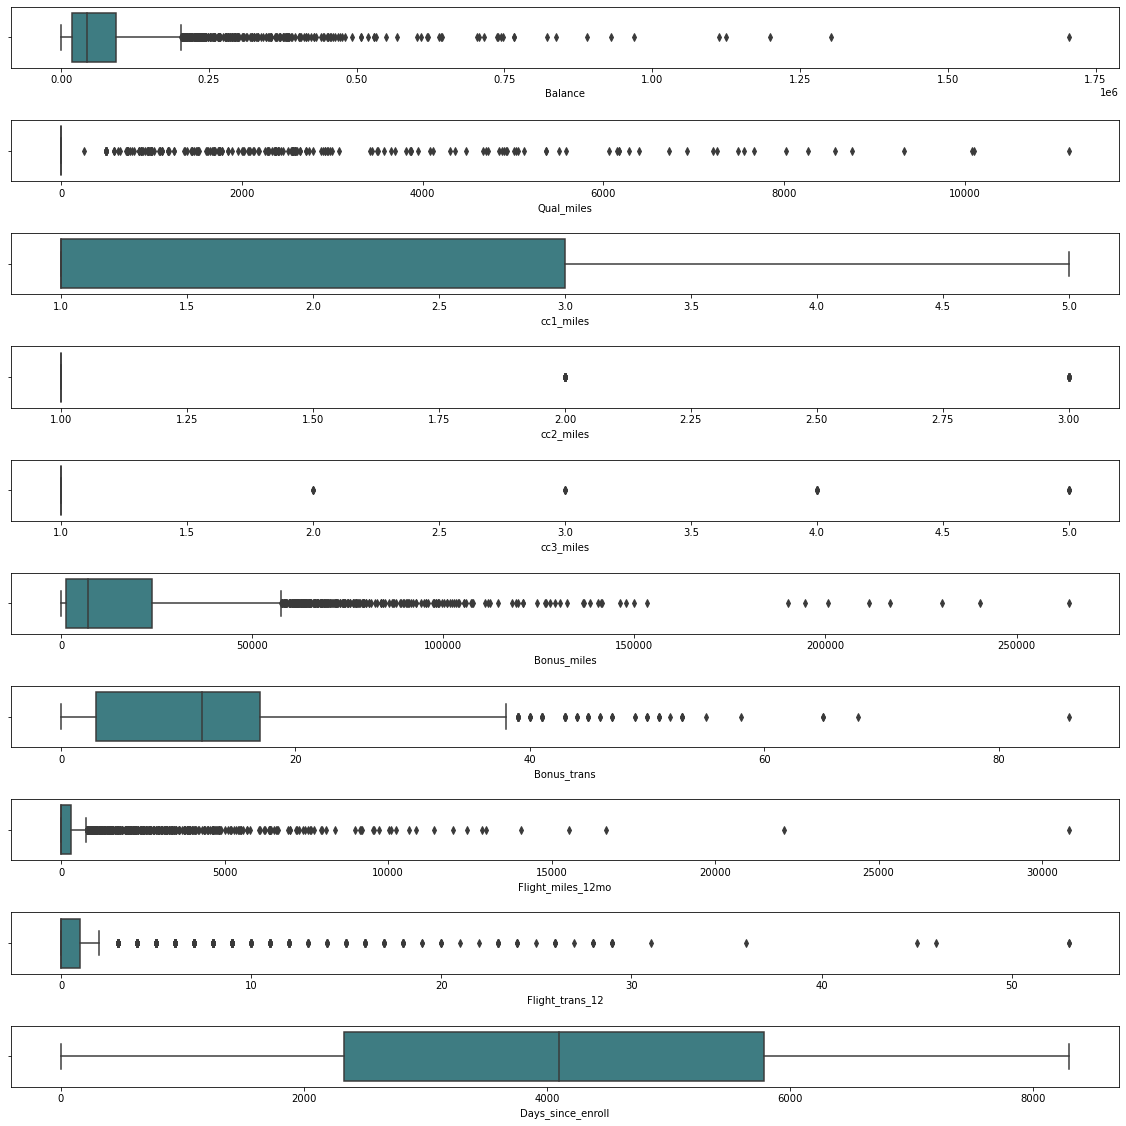

In [27]:
columns_to_plot = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']
fig, axes = plt.subplots(10, 1, figsize=(16, 16), sharex=False, sharey=False)
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=ot[col], palette='crest', ax=axes[i])
    axes[i].set_xlabel(col)  

plt.tight_layout(pad=2.0)
plt.show()

<AxesSubplot:>

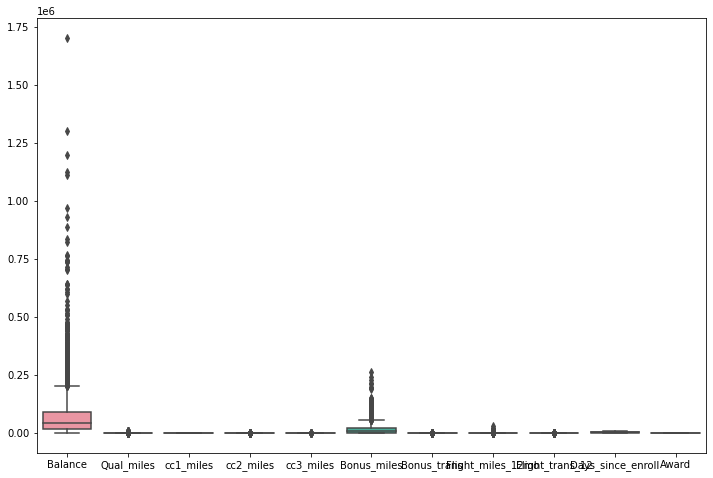

In [31]:
## box plot
plt.figure(figsize=(12,8))
sns.boxplot(data=Airlines)

<AxesSubplot:>

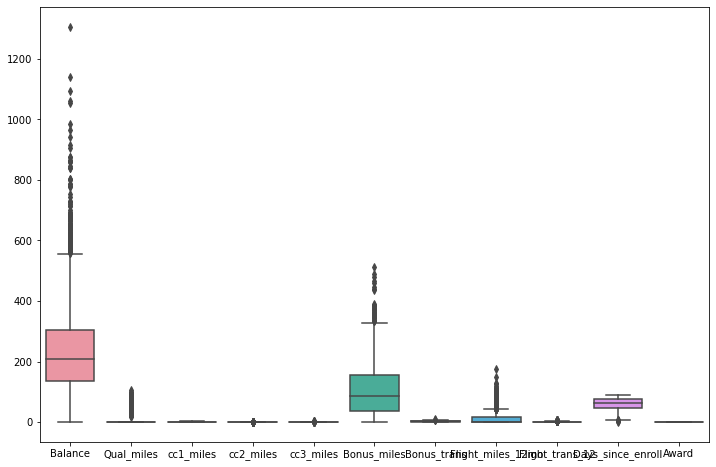

In [32]:
##we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(Airlines))

### Data Visualization

In [34]:
countNotermdeposit = len(Airlines[Airlines.Award == 0])
counthavetermdeposit = len(Airlines[Airlines.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(Airlines.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(Airlines.Award))*100)))


Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

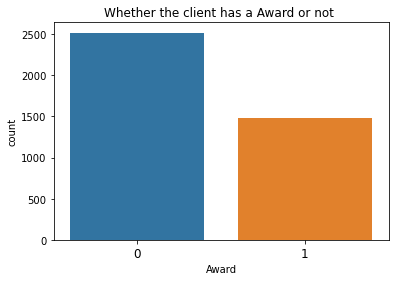

In [35]:
sns.countplot(x='Award', data=Airlines, 
              order=Airlines['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

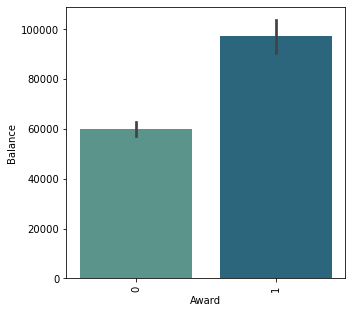

In [37]:
plt.figure(figsize=(5, 5))

Balance = Airlines[['Award', 'Balance']].sort_values('Balance', ascending=False)

ax = sns.barplot(x='Award', y='Balance', data=Balance, palette='crest')

ax.set(xlabel='Award', ylabel='Balance')
plt.xticks(rotation=90)

plt.show()


In [39]:
### correlation

corr_matrix = Airlines.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

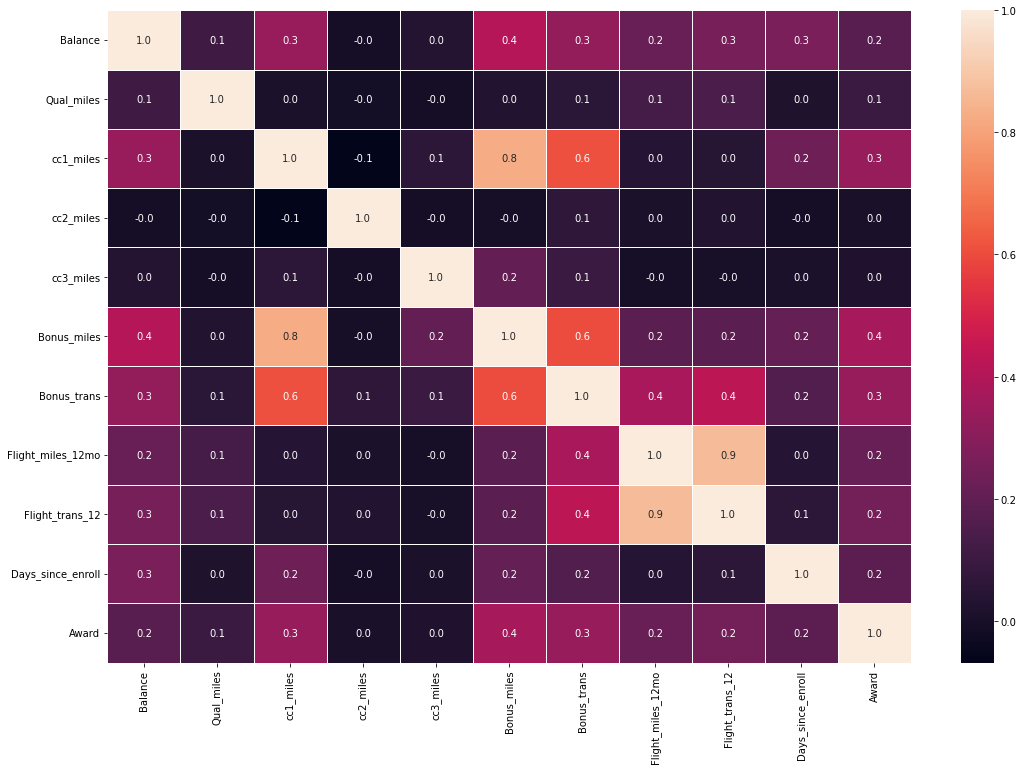

In [56]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(Airlines.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

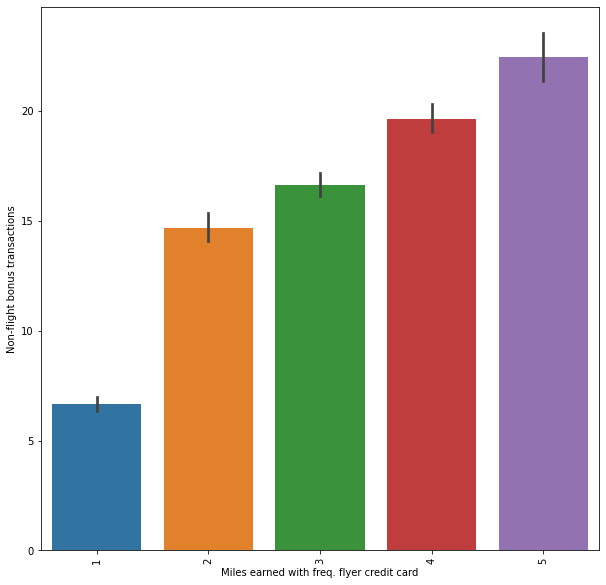

In [58]:
plt.figure(figsize=(10, 10))
sorted_data = Airlines[['cc1_miles', 'Bonus_trans']].sort_values('Bonus_trans', ascending=False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data=sorted_data)
ax.set(xlabel='Miles earned with freq. flyer credit card', ylabel='Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

### Standardizing the Data

In [59]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(Airlines)
std_df.shape

(3999, 11)

###  Normalizing the data


In [61]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(Airlines)
minmax_df.shape

(3999, 11)

## KMeans Clustering

In [62]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,43989.000000
1,2,35409.516630
2,3,30899.271222
3,4,27154.331169
4,5,23700.554569
5,6,21470.824246
6,7,19166.341317
7,8,17316.956935
8,9,16049.684339
9,10,14726.983323


C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

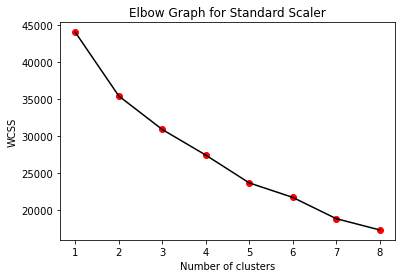

In [63]:
# Using Elbow Graph to find optimum number of  clusters (K value) from K values range


wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### Silhouette Score

In [64]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) 

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

C:\Users\Kajal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


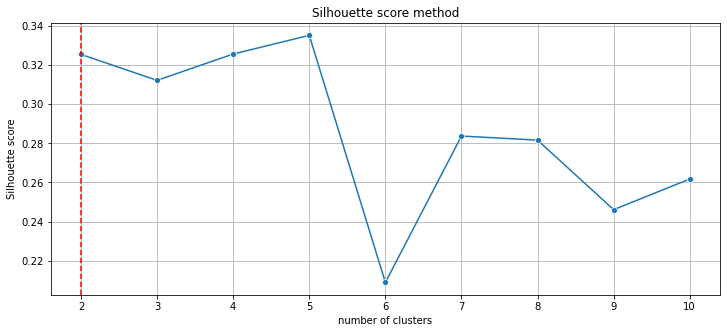

In [65]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [67]:
model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(3999,)

In [68]:
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [69]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [70]:
model_kmeans.cluster_centers_

array([[-0.15436921,  0.12224133, -0.26678883, -0.09824189, -0.06276658,
        -0.26852042, -0.10347479, -0.02661461, -0.01991719,  0.05352069,
         1.29384109],
       [-0.29965686, -0.09342981, -0.54597866, -0.09824189, -0.06030264,
        -0.51318446, -0.46455782, -0.21545477, -0.23737426, -0.24011724,
        -0.7669193 ],
       [ 0.63426351, -0.01770954,  1.48483175, -0.09824189, -0.05145859,
         1.26492109,  0.84042624, -0.06283237, -0.06241679,  0.45899739,
         0.43992637],
       [ 1.25116283,  0.87901237,  0.16817169, -0.09824189, -0.06276658,
         0.73352254,  1.76984334,  3.89902834,  4.14964398,  0.29011908,
         0.9330219 ],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.051

In [71]:
model_kmeans.inertia_

21470.514549809286

In [73]:
Airlines.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
Airlines['Kmeans_label'] = model_kmeans.labels_

In [74]:
Airlines.groupby('Kmeans_label').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,
0,58046.613139,238.676399,1.692214,1.000000,1.000000,10660.628954,10.608273,422.794404,1.298054,4229.072993,0.995134
1,43402.377767,71.874880,1.307026,1.000000,1.000481,4746.563041,7.137632,158.487969,0.473532,3620.526468,0.000000
2,137418.463065,130.271224,4.102536,1.000000,1.002205,47656.343991,19.665932,371.678060,1.135612,5069.828004,0.582139
3,199672.328358,824.089552,2.291045,1.000000,1.000000,34857.910448,28.597015,5918.828358,17.111940,4717.619403,0.820896
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


#### MinMaxScaler

In [81]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(3999,)

In [82]:
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [83]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [84]:
model_kmeans.cluster_centers_

array([[ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00],
       [ 3.50812450e-02,  7.85813260e-03,  1.76330421e-01,
         6.94996029e-03,  2.18427323e-03,  3.87875269e-02,
         1.06313612e-01,  7.34309944e-03,  1.23113582e-02,
         4.60411394e-01, -4.99600361e-16]])

In [85]:
model_kmeans.inertia_

823.6756984125204

### DBSCAN 

In [86]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [87]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


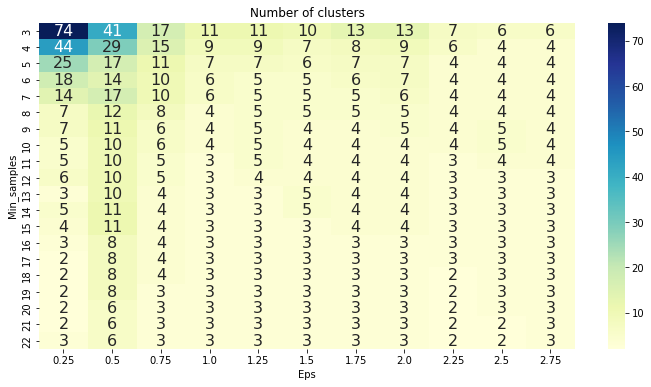

In [88]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

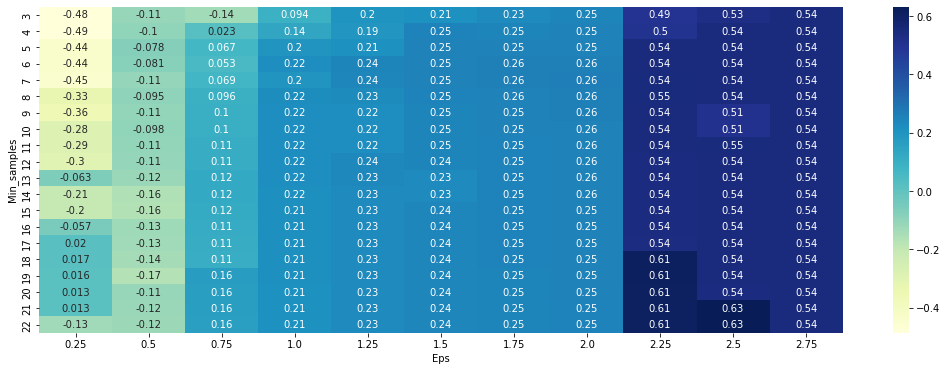

In [89]:
## As the heatplot above shows, the number of clusters vary from 74 to 2.

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

##### Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22


In [90]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


#### DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [91]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [92]:
dbscan.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
Airlines['DBSCAN_labels'] = dbscan.labels_
Airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,DBSCAN_labels
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0


In [95]:
Airlines.groupby('DBSCAN_labels').agg(['mean'])


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,
-1,211990.889423,1522.576923,2.509615,1.278846,1.235577,45335.081731,24.754808,3276.389423,9.548077,4768.596154,0.687500,3.009615
0,66008.336587,68.482722,2.034819,1.000000,1.000000,15598.138486,10.880243,305.532577,0.925086,4082.893959,0.352941,1.040095


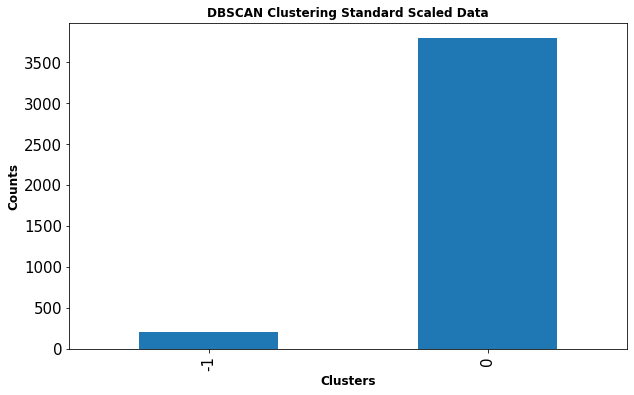

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))
Airlines.groupby(['DBSCAN_labels']).size().plot(kind='bar')
plt.ylabel('Counts')
plt.title('DBSCAN Clustering Standard Scaled Data', fontsize='large', fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


### DBSCAN on MinMax Scaled Data

In [98]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [99]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(minmax_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


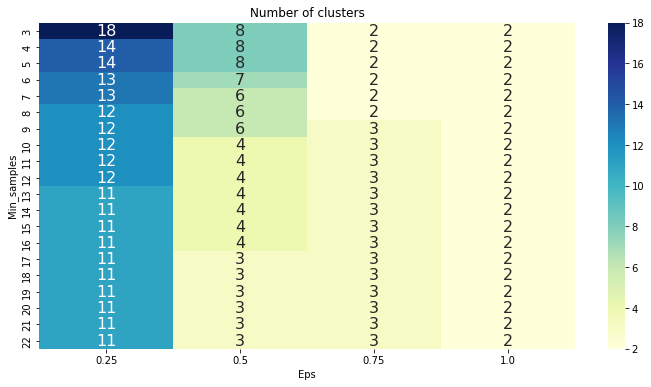

In [100]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

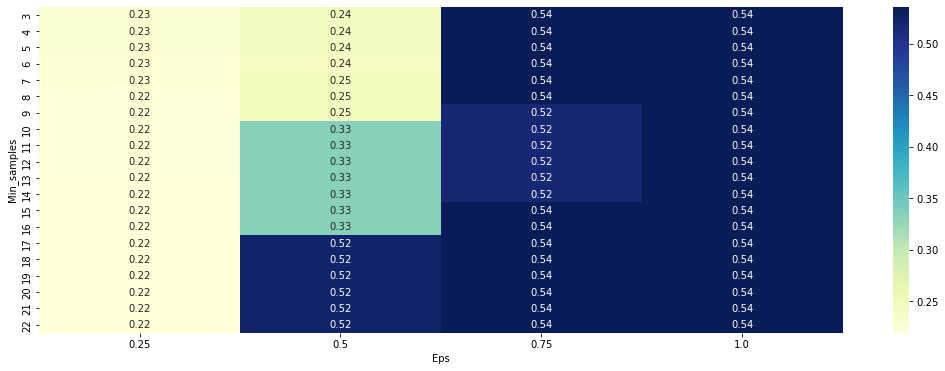

In [101]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [102]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5359


In [103]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.5359


In [104]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(eps=1, min_samples=22)

In [105]:
dbscan.labels_


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [107]:

Airlines['DBSCAN_labels'] = dbscan.labels_
Airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,DBSCAN_labels
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1


In [108]:
 Airlines.groupby('DBSCAN_labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.217633
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.014855


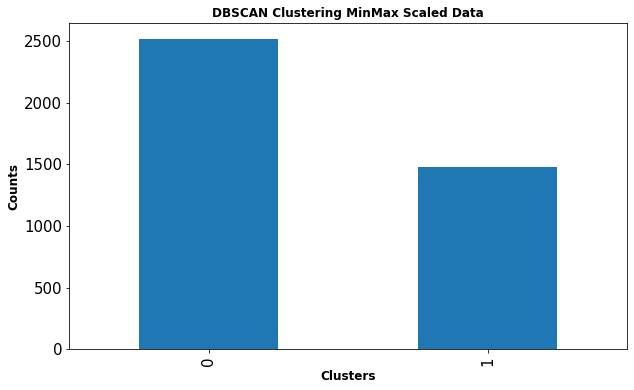

In [110]:
fig, ax = plt.subplots(figsize=(10, 6))
Airlines.groupby(['DBSCAN_labels']).size().plot(kind='bar')
plt.ylabel('Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data', fontsize='large', fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


In [112]:
cluster1 = pd.DataFrame(Airlines.loc[Airlines.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(Airlines.loc[Airlines.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])


In [113]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Balance,59807.839555,97053.051317
Qual_miles,87.602462,240.196489
cc1_miles,1.705322,2.661715
cc2_miles,1.013900,1.015530
cc3_miles,1.008737,1.018231
Bonus_miles,10227.689039,28905.414585
Bonus_trans,9.142971,15.782579
Flight_miles_12mo,226.292295,857.501013
Flight_trans_12,0.652502,2.599595
Days_since_enroll,3820.652105,4625.062120


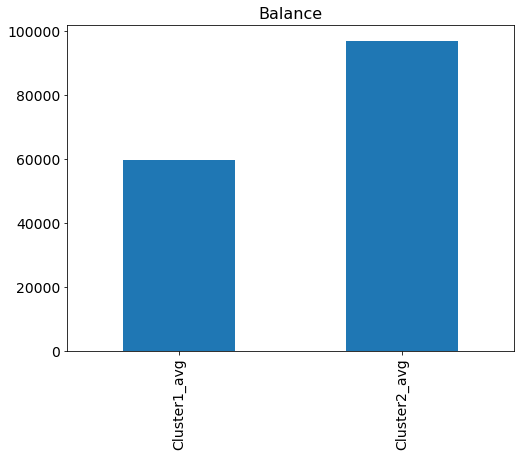

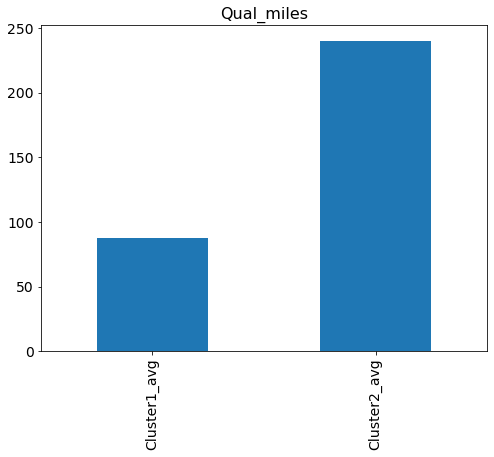

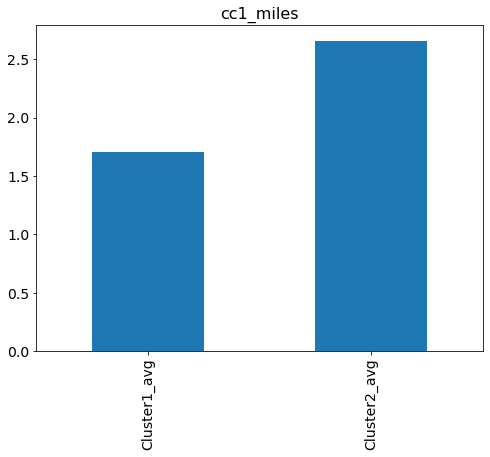

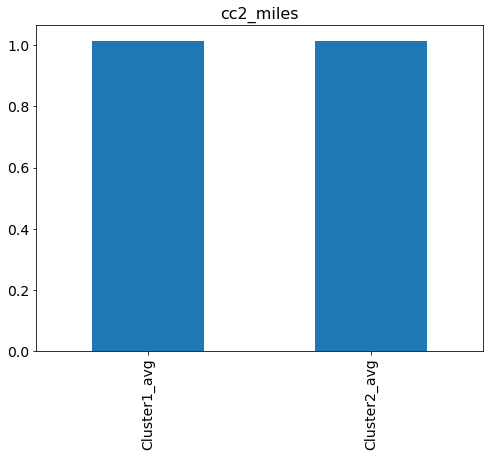

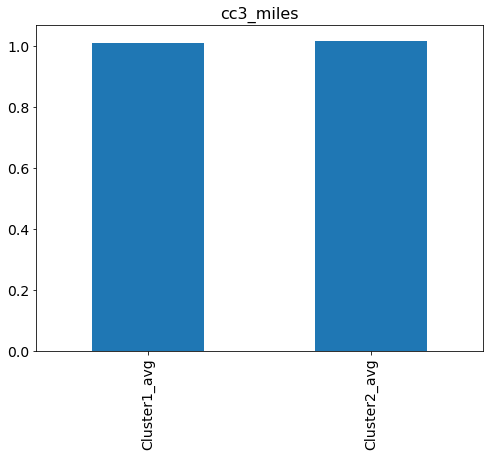

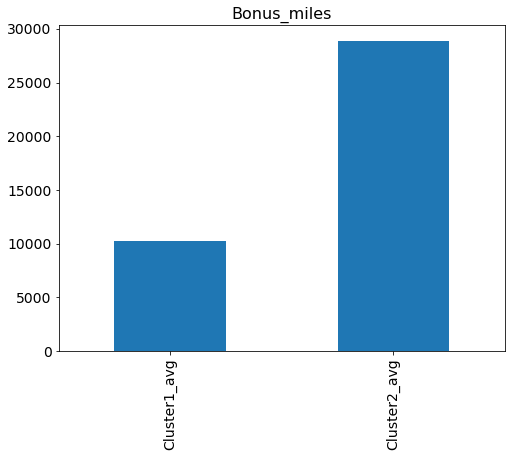

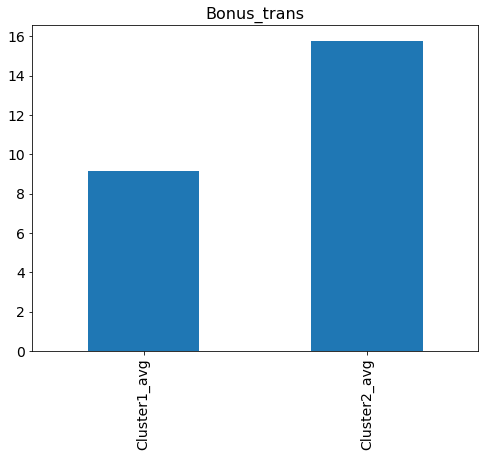

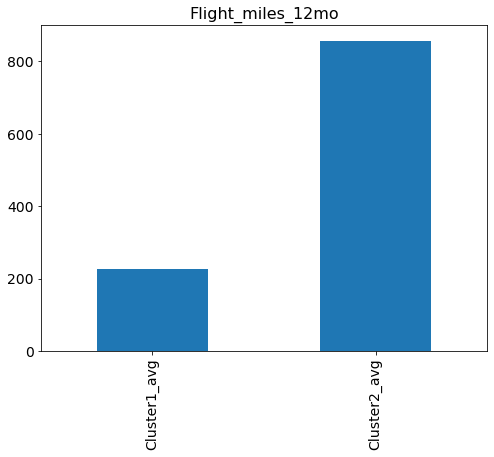

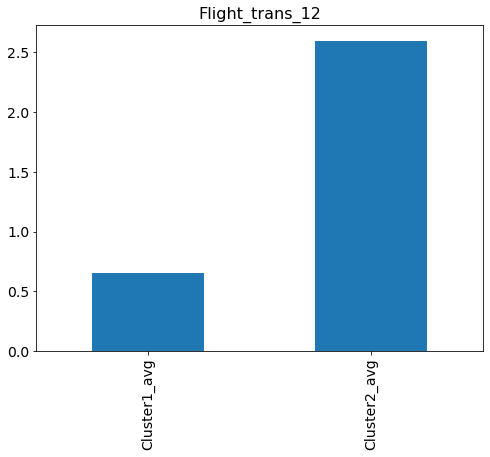

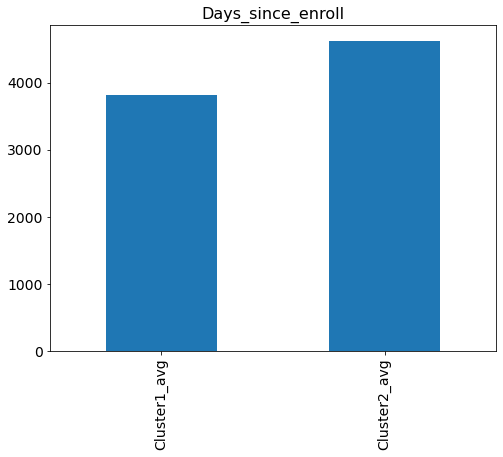

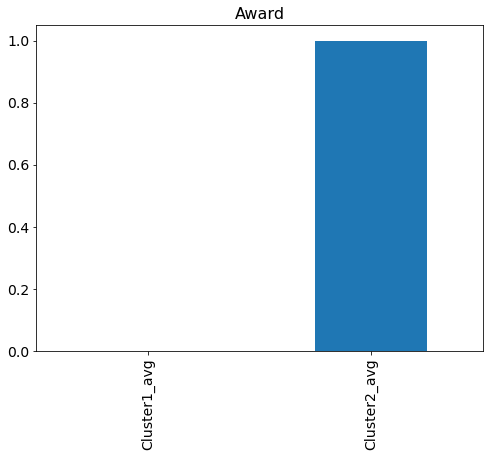

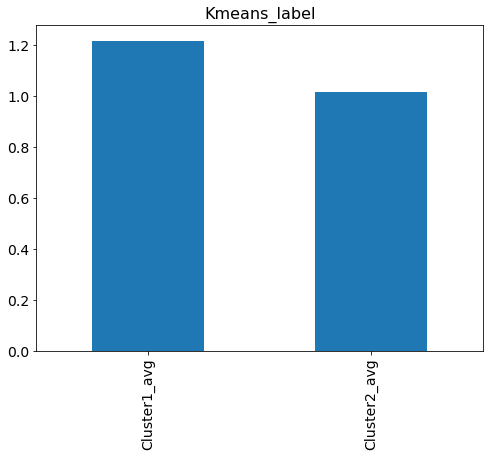

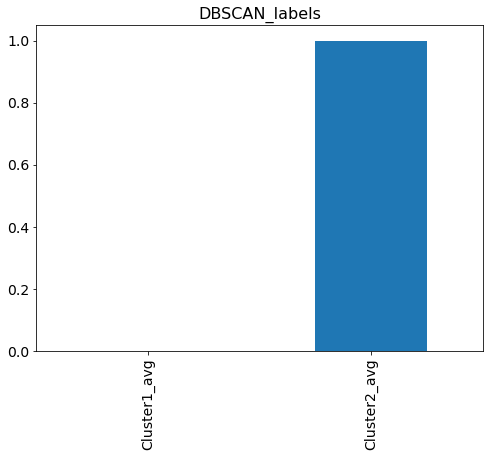

In [114]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()